Erster Schritt: Wir laden zuerst alle nötigen Packages. Diese enthalten Funktionen, die wir später verwenden möchten und, die nicht Teil von base R sind.

**Reminder** : Falls du ein Package noch nie benutzt hast, musst du es erst mit dem Befehl install.packages("PACKAGE_NAME") installieren.

In [58]:
library(tidyverse)
library(scales)
library(lubridate)
library(ggokabeito)

# Import ---------------------------------------------------
**Reminder** : <- benutzen wir, um Variablen/Vektoren/Dataframes zu deklarieren.

In [59]:
trips_data <- read_delim("https://github.com/Sydpaltra/GrundlagenVL051623/raw/main/kelheim-v2.0-25pct-av.output_trips.csv.gz", delim = ";")

trips_data <- data.frame(trips_data)

Rows: 157575 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (11): person, trip_id, main_mode, longest_distance_mode, modes, start_a...
dbl   (9): trip_number, traveled_distance, euclidean_distance, start_x, star...
time  (3): dep_time, trav_time, wait_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Wir benutzen `glimpse()` um uns einen ersten Überblick über die Daten zu verschaffen.

In [60]:
glimpse(trips_data)

Rows: 157,575
Columns: 23
$ person                 <chr> "1", "1", "1", "10", "100", "100", "100", "100"…
$ trip_number            <dbl> 1, 2, 3, 1, 1, 2, 3, 4, 5, 1, 2, 1, 2, 1, 2, 1,…
$ trip_id                <chr> "1_1", "1_2", "1_3", "10_1", "100_1", "100_2", …
$ dep_time               <time> 05:01:28, 10:54:36, 14:52:01, 09:59:29, 12:02:…
$ trav_time              <time> 03:28:57, 02:55:11, 01:18:31, 03:36:51, 00:07:…
$ wait_time              <time> 00:00:00, 00:00:00, 00:00:00, 00:00:00, 00:00:…
$ traveled_distance      <dbl> 290584, 325079, 111193, 327147, 2073, 16324, 16…
$ euclidean_distance     <dbl> 232441, 275327, 82542, 268963, 1284, 13663, 109…
$ main_mode              <chr> "car", "car", "car", "car", "car", "car", "car"…
$ longest_distance_mode  <chr> "car", "car", "car", "car", "car", "car", "car"…
$ modes                  <chr> "walk-car-walk", "walk-car-walk", "walk-car-wal…
$ start_activity_type    <chr> "home_21600", "accomp_other_4800", "shop_daily_…
$ end_activity

Wir benutzen `head()`, um uns die ersten Zeilen eines Dataframes anzuschauen.

In [61]:
head(trips_data)

,person,trip_number,trip_id,dep_time,trav_time,wait_time,traveled_distance,euclidean_distance,main_mode,longest_distance_mode,⋯,start_facility_id,start_link,start_x,start_y,end_facility_id,end_link,end_x,end_y,first_pt_boarding_stop,last_pt_egress_stop
,<chr>,<dbl>,<chr>,<time>,<time>,<time>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1_1,05:01:28,03:28:57,00:00:00,290584,232441,car,car,⋯,null,-28677364,326152.2,5728731,null,42368106#0,476173.7,5551186,NA,NA
2,1,2,1_2,10:54:36,02:55:11,00:00:00,325079,275327,car,car,⋯,null,42368106#0,476173.7,5551186,null,-144919951,725518.9,5434428,NA,NA
3,1,3,1_3,14:52:01,01:18:31,00:00:00,111193,82542,car,car,⋯,null,-144919951,725518.9,5434428,null,-24580391,714123.9,5352676,NA,NA
4,10,1,10_1,09:59:29,03:36:51,00:00:00,327147,268963,car,car,⋯,null,4514491,475990.9,5550879,null,-29467722#1,707082.9,5413265,NA,NA
5,100,1,100_1,12:02:00,00:07:07,00:00:00,2073,1284,car,car,⋯,null,-749560274#1,678373.3,5404023,null,-33814393,678439.8,5402741,NA,NA
6,100,2,100_2,16:03:00,00:21:57,00:00:00,16324,13663,car,car,⋯,null,-33814393,678439.8,5402741,null,-26737204#0,691467.0,5406862,NA,NA


Wir benutzen `tail()`, um uns die letzten Zeilen eines Dataframes anzuschauen.

In [62]:
tail(trips_data)

,person,trip_number,trip_id,dep_time,trav_time,wait_time,traveled_distance,euclidean_distance,main_mode,longest_distance_mode,⋯,start_facility_id,start_link,start_x,start_y,end_facility_id,end_link,end_x,end_y,first_pt_boarding_stop,last_pt_egress_stop
,<chr>,<dbl>,<chr>,<time>,<time>,<time>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
157570,freight_994,1,freight_994_1,10:18:42,04:18:51,00:00:00,351985,288096,freight,freight,⋯,null,-38620844#1,703506.8,5384851,null,-177817712,458401.3,5536254,NA,NA
157571,freight_995,1,freight_995_1,20:44:19,04:18:59,00:00:00,352085,288162,freight,freight,⋯,null,-38620844#1,703506.8,5384851,null,23135819,458308.1,5536227,NA,NA
157572,freight_996,1,freight_996_1,14:00:58,04:18:59,00:00:00,352085,288162,freight,freight,⋯,null,-38620844#1,703506.8,5384851,null,23135819,458308.1,5536227,NA,NA
157573,freight_997,1,freight_997_1,09:50:10,04:15:59,00:00:00,330777,275596,freight,freight,⋯,null,-38620844#1,703506.8,5384851,null,-22903070,486185.3,5554335,NA,NA
157574,freight_998,1,freight_998_1,15:47:58,04:14:15,00:00:00,341399,282161,freight,freight,⋯,null,-38620844#1,703506.8,5384851,null,426559935,495423.5,5575420,NA,NA
157575,freight_999,1,freight_999_1,05:12:43,04:42:08,00:00:00,384825,311590,freight,freight,⋯,null,-38620844#1,703506.8,5384851,null,-37890178,481667.9,5603657,NA,NA


Wir benutzen `sample_n()`, um uns 6 beliebige Zeilen ausgeben zu lassen.

In [63]:
sample_n(trips_data, size = 6)

person,trip_number,trip_id,dep_time,trav_time,wait_time,traveled_distance,euclidean_distance,main_mode,longest_distance_mode,⋯,start_facility_id,start_link,start_x,start_y,end_facility_id,end_link,end_x,end_y,first_pt_boarding_stop,last_pt_egress_stop
<chr>,<dbl>,<chr>,<time>,<time>,<time>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
41837,2,41837_2,11:51:37,00:13:56,00:00:00,12485,9114,car,car,⋯,null,-338358737,732615.0,5429781,null,-27335527#0,724809.5,5425075,NA,NA
6188,2,6188_2,12:08:36,00:10:36,00:00:00,4205,782,car,car,⋯,null,-18813598#1,676272.5,5404165,null,-139230366,676826.1,5404718,NA,NA
36675,3,36675_3,19:04:30,00:12:41,00:00:00,13078,11056,ride,ride,⋯,null,-56403362,720124.4,5416214,null,-127184730,711204.7,5422747,NA,NA
3532,4,3532_4,16:02:00,00:14:23,00:00:00,11479,8536,car,car,⋯,null,-67307070,693118.6,5387074,null,-263481420#1,697228.8,5394556,NA,NA
10182,2,10182_2,14:49:00,00:16:52,00:00:00,12615,9307,ride,ride,⋯,null,34075011,727533.2,5433938,null,-29084530#3,723810.6,5425407,NA,NA
4398,3,4398_3,19:10:00,00:20:07,00:00:00,16167,13437,car,car,⋯,null,-32457008#0,692378.0,5387476,null,-288903447#1,705151.2,5391648,NA,NA


# TIDY --------------------------------------------------------------------

Nutze `colnames()`, um die Spaltennamen des Dataframes anzusehen.

In [64]:
colnames(trips_data)

[1] "person"                 "trip_number"            "trip_id"               
 [4] "dep_time"               "trav_time"              "wait_time"             
 [7] "traveled_distance"      "euclidean_distance"     "main_mode"             
[10] "longest_distance_mode"  "modes"                  "start_activity_type"   
[13] "end_activity_type"      "start_facility_id"      "start_link"            
[16] "start_x"                "start_y"                "end_facility_id"       
[19] "end_link"               "end_x"                  "end_y"                 
[22] "first_pt_boarding_stop" "last_pt_egress_stop"

Mithilfe von `pivot_longer()`transformieren wir unser Dataframe in das tidy Format.

In [65]:
trips_data_tidy <- trips_data %>% select(trip_id, dep_time, trav_time, wait_time) %>% 
  pivot_longer(cols = c("dep_time", "trav_time", "wait_time"), values_to = "Duration", names_to = "Considered_Time")

#Erneutes nutzen von head(), um uns die ersten Zeilen anzusehen
head(trips_data_tidy)

trip_id,Considered_Time,Duration
<chr>,<chr>,<time>
1_1,dep_time,05:01:28
1_1,trav_time,03:28:57
1_1,wait_time,00:00:00
1_2,dep_time,10:54:36
1_2,trav_time,02:55:11
1_2,wait_time,00:00:00


# TRANSFORM ---------------------------------------------------------------

## select()
Wir wählen nur die Spalten aus, für die wir uns interessieren

**Reminder** : %>% ist der Pipe-Operator. Wir nutzen ihn, um Operationen miteinander zu verknüpfen.

In [66]:
trips_data <- trips_data %>% select("person", "dep_time", "trav_time", "wait_time", "traveled_distance", "main_mode", "longest_distance_mode", "modes")

## mutate()

_Fortgeschrittenes Beispiel_: Wir wandeln die verschiedenen Zeiten-Spalten in sogenannte _date-time_ Objects um.

**Reminder** : `#` benutzen wir für Kommentare.

In [68]:
#Transformieren der verschiedenen Zeiten
#Ersten 3 Zeilen: Runden der Zeiten auf 5 Minuten
#Nächsten 3 Zeilen: Transformation zu sog. "date-time" Objekten
#Letzten 2 Zeilen: Konverte "date-time" Objekte in Sekunden
trips_data <- trips_data %>% mutate(dep_time_round = hms::round_hms(hms::as_hms(dep_time), secs = 300)) %>%
               mutate(trav_time_round = hms::round_hms(hms::as_hms(trav_time), secs = 300)) %>%
               mutate(wait_time_round = hms::round_hms(hms::as_hms(wait_time), secs = 300)) %>%
               mutate(dep_time = hms(as.character(dep_time))) %>%
               mutate(trav_time = hms(as.character(trav_time))) %>%
               mutate(wait_time = hms(as.character(wait_time))) %>%
               mutate(dep_time_seconds = period_to_seconds(dep_time)) %>%
               mutate(wait_time_seconds = period_to_seconds(wait_time))

#Nutze head(), um die ersten Zeilen anzuschauen
head(trips_data$wait_time_round)


00:00:00
00:00:00
00:00:00
00:00:00
00:00:00
00:00:00

Einfaches Beispiel: Wir nutzen `mutate()`, um eine Spalte für die Ankunftszeit zu unserem Dataframe hinzuzufügen.

In [69]:
trips_data %>% mutate(arrival_time = dep_time + wait_time + trav_time)

person,dep_time,trav_time,wait_time,traveled_distance,main_mode,longest_distance_mode,modes,dep_time_round,trav_time_round,wait_time_round,dep_time_seconds,wait_time_seconds,arrival_time
<chr>,<Period>,<Period>,<Period>,<dbl>,<chr>,<chr>,<chr>,<time>,<time>,<time>,<dbl>,<dbl>,<Period>
1,5H 1M 28S,3H 28M 57S,0S,290584,car,car,walk-car-walk,05:00:00,03:30:00,00:00:00,18088,0,8H 29M 85S
1,10H 54M 36S,2H 55M 11S,0S,325079,car,car,walk-car-walk,10:55:00,02:55:00,00:00:00,39276,0,12H 109M 47S
1,14H 52M 1S,1H 18M 31S,0S,111193,car,car,walk-car-walk,14:50:00,01:20:00,00:00:00,53521,0,15H 70M 32S
10,9H 59M 29S,3H 36M 51S,0S,327147,car,car,walk-car-walk,10:00:00,03:35:00,00:00:00,35969,0,12H 95M 80S
100,12H 2M 0S,7M 7S,0S,2073,car,car,walk-car-walk,12:00:00,00:05:00,00:00:00,43320,0,12H 9M 7S
100,16H 3M 0S,21M 57S,0S,16324,car,car,walk-car-walk,16:05:00,00:20:00,00:00:00,57780,0,16H 24M 57S
100,18H 3M 0S,20M 20S,0S,16443,car,car,walk-car-walk,18:05:00,00:20:00,00:00:00,64980,0,18H 23M 20S
100,19H 46M 0S,34M 50S,0S,26683,car,car,walk-car-walk,19:45:00,00:35:00,00:00:00,71160,0,19H 80M 50S
100,21H 26M 0S,14M 21S,0S,5312,car,car,walk-car-walk,21:25:00,00:15:00,00:00:00,77160,0,21H 40M 21S


## arrange()

Von Interesse sind beispielsweise sehr kurze und auch sehr lange Wartezeiten. Um uns einen Überblick über die kürzesten und längsten Wartezeiten zu verschaffen, nutzen wir `arrange()`.

In [70]:
trips_data %>% arrange(dep_time)

person,dep_time,trav_time,wait_time,traveled_distance,main_mode,longest_distance_mode,modes,dep_time_round,trav_time_round,wait_time_round,dep_time_seconds,wait_time_seconds
<chr>,<Period>,<Period>,<Period>,<dbl>,<chr>,<chr>,<chr>,<time>,<time>,<time>,<dbl>,<dbl>
10131,0S,19M 50S,0S,1257,walk,walk,walk,00:00:00,00:20:00,00:00:00,0,0
10312,0S,1H 24M 37S,0S,122273,ride,ride,walk-ride-walk,00:00:00,01:25:00,00:00:00,0,0
1043,0S,12M 32S,0S,7588,car,car,walk-car-walk,00:00:00,00:15:00,00:00:00,0,0
10638,0S,19M 50S,0S,16584,ride,ride,walk-ride-walk,00:00:00,00:20:00,00:00:00,0,0
10788,0S,12M 34S,0S,2369,bike,bike,bike,00:00:00,00:15:00,00:00:00,0,0
11309,0S,16M 29S,0S,10585,car,car,walk-car-walk,00:00:00,00:15:00,00:00:00,0,0
11387,0S,16M 35S,0S,13665,ride,ride,walk-ride-walk,00:00:00,00:15:00,00:00:00,0,0
11432,0S,12M 9S,0S,12686,ride,ride,walk-ride-walk,00:00:00,00:10:00,00:00:00,0,0
12235,0S,9M 42S,0S,6038,ride,ride,walk-ride-walk,00:00:00,00:10:00,00:00:00,0,0


**Reminder** : `desc()` nutzen wir, um die ausgewählte Spalte in absteigender Reihenfolge zu sortieren.

In [71]:
trips_data %>% arrange(desc(dep_time))

person,dep_time,trav_time,wait_time,traveled_distance,main_mode,longest_distance_mode,modes,dep_time_round,trav_time_round,wait_time_round,dep_time_seconds,wait_time_seconds
<chr>,<Period>,<Period>,<Period>,<dbl>,<chr>,<chr>,<chr>,<time>,<time>,<time>,<dbl>,<dbl>
5573,35H 59M 36S,0S,0S,0,walk,NA,walk,36:00:00,00:00:00,00:00:00,129576,0
19928,35H 56M 42S,0S,0S,0,walk,NA,walk,35:55:00,00:00:00,00:00:00,129402,0
28500,35H 56M 2S,2M 11S,0S,964,car,car,walk-car-walk,35:55:00,00:00:00,00:00:00,129362,0
36156,35H 55M 46S,3M 29S,0S,1282,car,car,walk-car-walk,35:55:00,00:05:00,00:00:00,129346,0
1785,35H 55M 38S,3M 20S,0S,1065,car,car,walk-car-walk,35:55:00,00:05:00,00:00:00,129338,0
7857,35H 55M 33S,1M 38S,0S,752,car,car,walk-car-walk,35:55:00,00:00:00,00:00:00,129333,0
34202,35H 55M 20S,4M 23S,0S,2823,ride,ride,walk-ride-walk,35:55:00,00:05:00,00:00:00,129320,0
13121,35H 55M 18S,4M 34S,0S,2572,car,car,walk-car-walk,35:55:00,00:05:00,00:00:00,129318,0
34866,35H 55M 1S,4M 53S,0S,1909,car,car,walk-car-walk,35:55:00,00:05:00,00:00:00,129301,0


Mit `slice()` schneiden wir die angegebenen Zeilen heraus

In [73]:
trips_data %>% slice(5:10)

person,dep_time,trav_time,wait_time,traveled_distance,main_mode,longest_distance_mode,modes,dep_time_round,trav_time_round,wait_time_round,dep_time_seconds,wait_time_seconds
<chr>,<Period>,<Period>,<Period>,<dbl>,<chr>,<chr>,<chr>,<time>,<time>,<time>,<dbl>,<dbl>
100,12H 2M 0S,7M 7S,0S,2073,car,car,walk-car-walk,12:00:00,00:05:00,00:00:00,43320,0
100,16H 3M 0S,21M 57S,0S,16324,car,car,walk-car-walk,16:05:00,00:20:00,00:00:00,57780,0
100,18H 3M 0S,20M 20S,0S,16443,car,car,walk-car-walk,18:05:00,00:20:00,00:00:00,64980,0
100,19H 46M 0S,34M 50S,0S,26683,car,car,walk-car-walk,19:45:00,00:35:00,00:00:00,71160,0
100,21H 26M 0S,14M 21S,0S,5312,car,car,walk-car-walk,21:25:00,00:15:00,00:00:00,77160,0
1000,6H 50M 0S,7M 2S,0S,4932,car,car,walk-car-walk,06:50:00,00:05:00,00:00:00,24600,0


## Statistiken

In [74]:
sum(trips_data$wait_time_seconds) #Wie lang ist die Wartezeit insgesamt?
mean(trips_data$wait_time_seconds) #Was ist der Mittelwert der Variable "wait_time_seconds"?
median(trips_data$wait_time_seconds) #Was ist der Median der Variable "wait_time_seconds"? Unterscheidung Median/Mean?

max(trips_data$wait_time_seconds) #Findet das erste(!) Maxium der Spalte
which.max(trips_data$wait_time_seconds) #Findet die Position des ersten(!) Maximums der Spalte

min(trips_data$wait_time_seconds) #Findet das erste(!) Minimum der Spalte
which.min(trips_data$wait_time_seconds) #Findet die Position des ersten(!) Minimums der Spalte

[1] 4316220

[1] 27.39153

[1] 0

[1] 9184

[1] 127297

[1] 0

[1] 1

# VISUALISE ---------------------------------------------------------------

## Lineplot

Der folgende Code-Block erstellt einen Lineplot, mit dem wir die Frage beantworten wollen: "Wie verteilen sich die Trips über den Tag?"

**Reminder** : `+` nutzen wir, um unserem Ggplot weitere Ebenen hinzuzufügen.

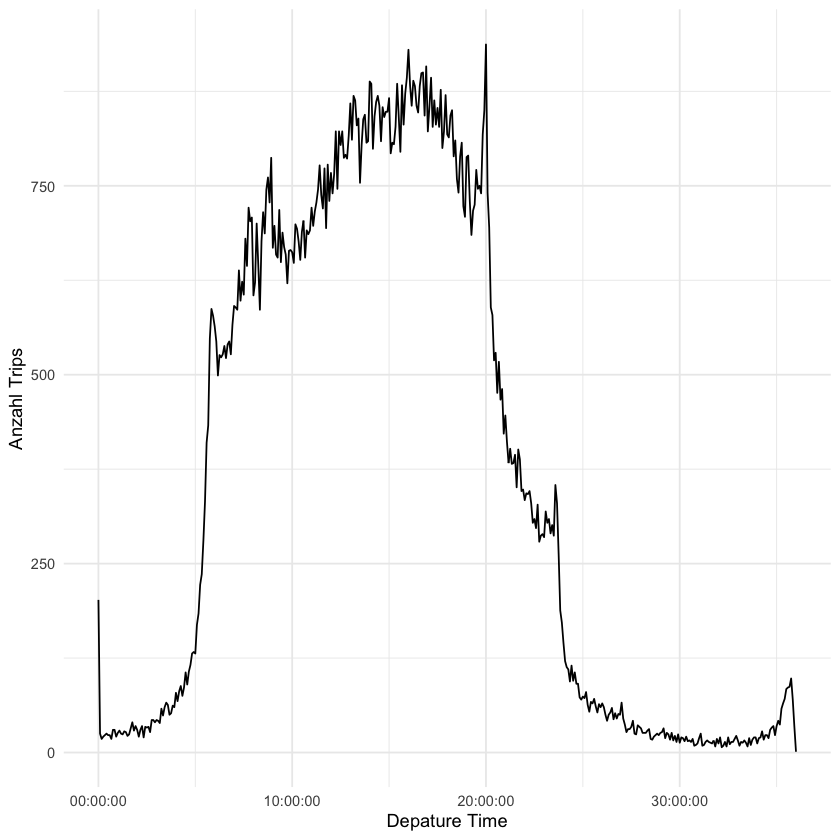

In [75]:
trips_data %>% group_by(dep_time_round) %>% count() %>% #Mit count() zählen wir die Anzahl der Trips
ggplot(aes(x = dep_time_round, y = n)) +
  geom_line() + 
  xlab("Depature Time") + #Beschriftung der x-Achse
  ylab("Anzahl Trips") + #Beschriftung der y-Achse
  theme_minimal() +
  theme(legend.position = "bottom", legend.title = element_blank()) #Unsere Legende soll sich unten befinden und keinen Titel haben

## Histogramm

1. Andere Darstellung der Frage: "Wie verteilen sich die Trips über den Tag?"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


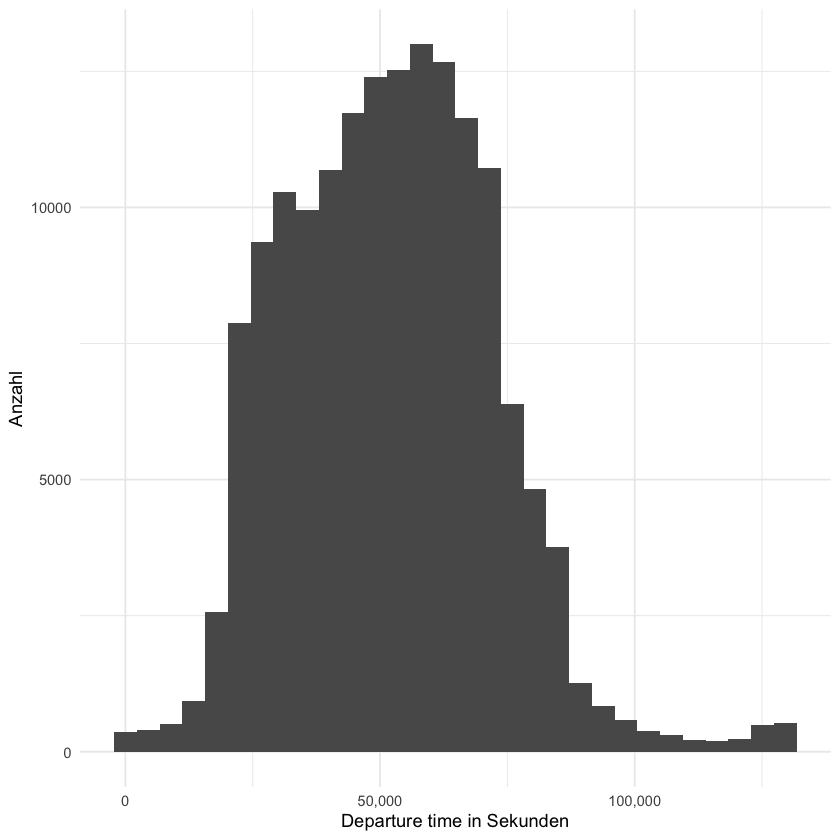

In [76]:
ggplot(trips_data, aes(x=dep_time_seconds)) +
  geom_histogram() +
  theme_minimal() +
  xlab("Departure time in Sekunden") + #Beschriftung der x-Achse
  ylab("Anzahl") + #Beschriftung der y-Achse
  scale_x_continuous(labels=comma)

2. Darstellung der Verteilung der Wartezeit (in Sekunden) mithilfe eines Histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


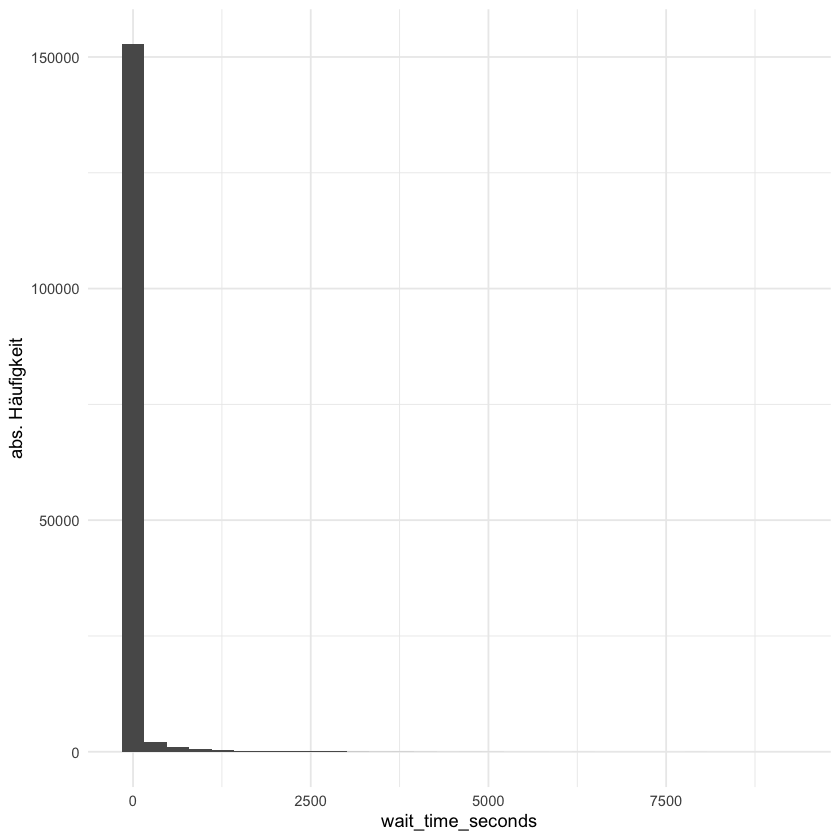

In [77]:
trips_data %>% 
  ggplot(aes(x = wait_time_seconds)) +
  geom_histogram() +
  theme_minimal() +
  ylab("abs. Häufigkeit")

Erste Verbesserung des Plots:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


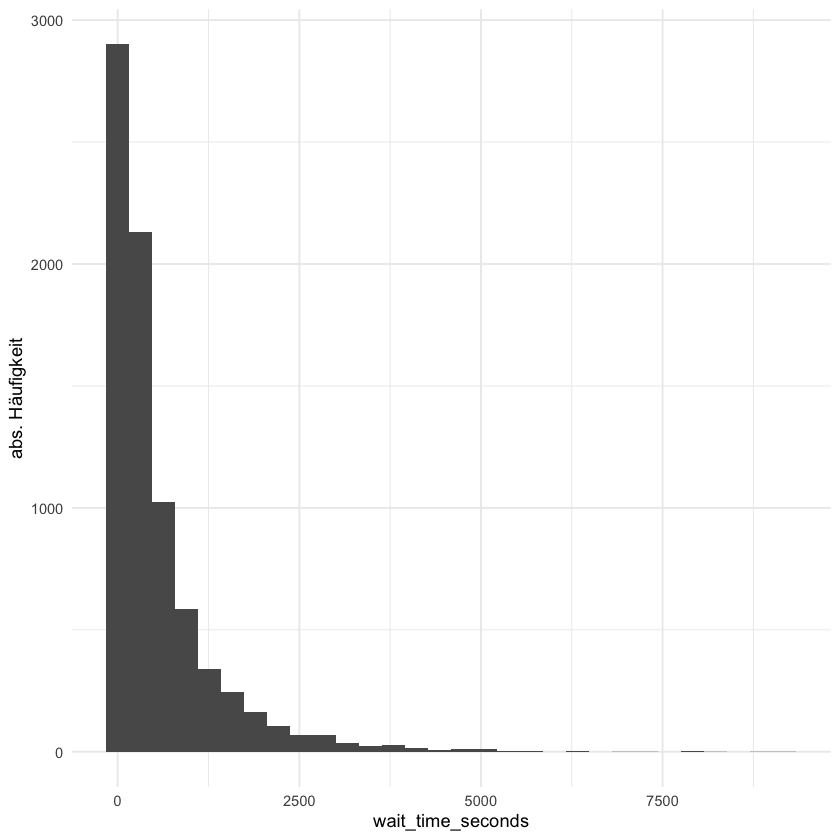

In [78]:
trips_data %>% filter(wait_time_seconds > 0) %>% #Wir betrachten nur Trips, die eine Wartezeit größer als 0 haben.
ggplot(aes(x = wait_time_seconds)) +
  geom_histogram() +
  theme_minimal() +
  ylab("abs. Häufigkeit")

Zweite Verbesserung des Plots: 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


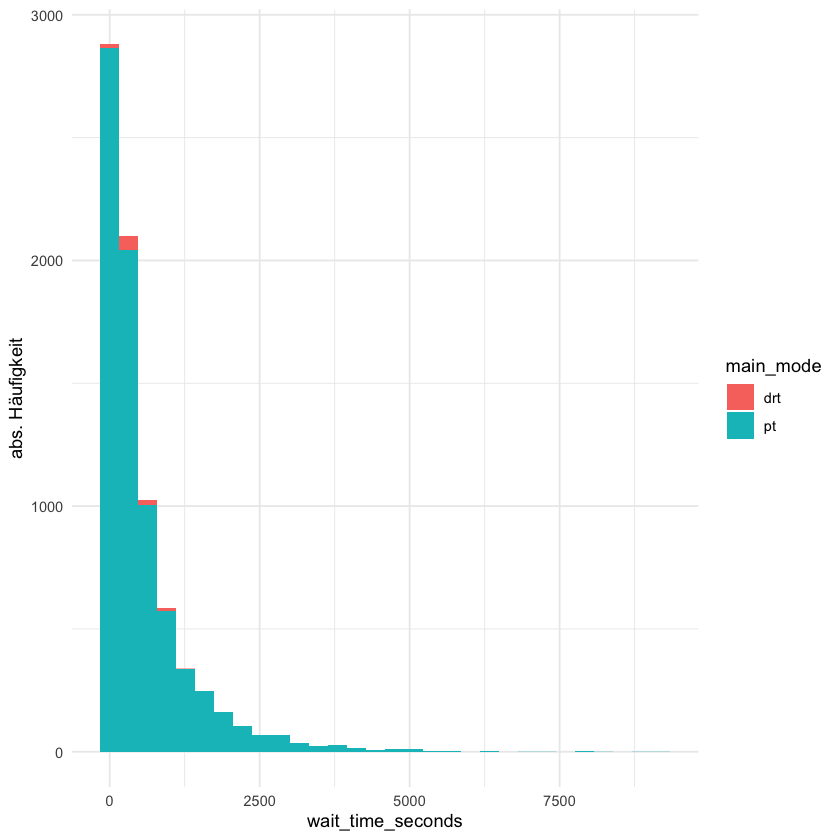

In [79]:
trips_data %>% filter(main_mode == "pt" | main_mode == "drt") %>%
  ggplot(aes(x = wait_time_seconds, fill = main_mode)) + #Hier ordnen wir pt und drt jeweils eine Farbe zu!
  geom_histogram() +
  theme_minimal() +
  ylab("abs. Häufigkeit")

## Pie Chart

Zur Darstellung des Modal Split

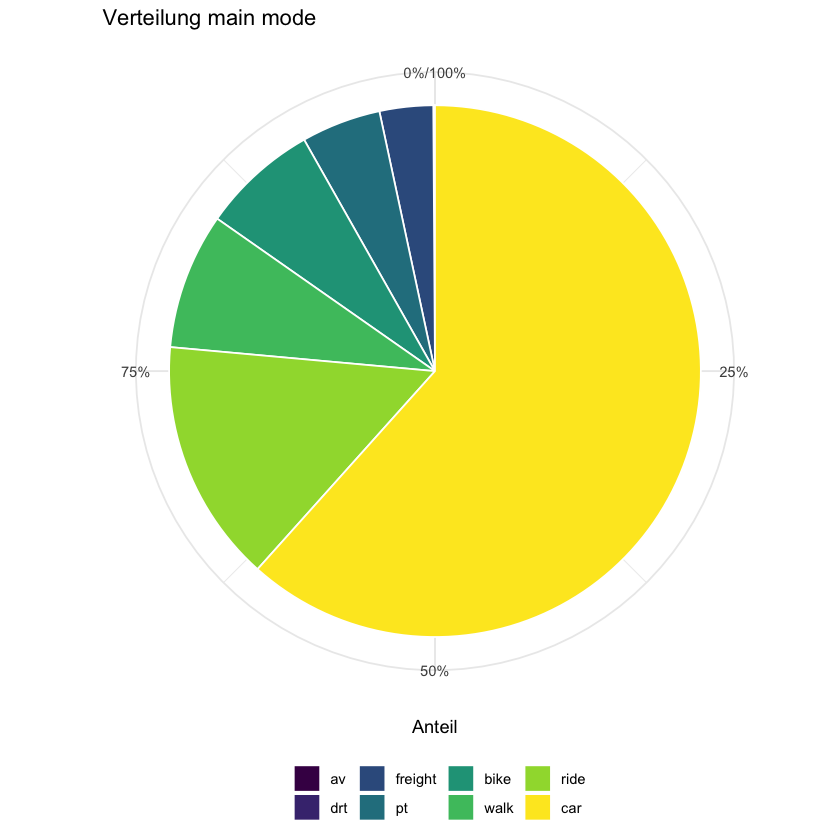

In [80]:
trips_data$main_mode <- factor(trips_data$main_mode, levels = rev(c("car", "ride", "walk", "bike", "pt", "freight", "drt", "av")))

trips_data %>% count(main_mode) %>% mutate(Anteil = n / sum(n)) %>% #Berechnung der Anzahl der Trips, pro main mode; dann: Berechnung des Anteil dieses main modes an der Gesamtheit der Trips
  ggplot(aes(x= "", y = Anteil, fill = main_mode)) +
  geom_col(color = "white") + #Sort für weiße Linien zwischen den Slices(deutsch?)
  xlab("") +
  ggtitle("Verteilung main mode") +
  coord_polar("y", start = 0) + 
  scale_y_continuous(labels = scales::percent) + #Da wir Anteile betrachten, soll die Achsenbeschriftung in Prozent erfolgen
  theme_minimal() +
  theme(legend.position = "bottom", legend.title = element_blank()) + #Legende wird unten im Plot positioniert, kein Legendentitel
  scale_fill_viridis_d() #Farbskala, für die ich mich entschieden habe

## Lineplot (die 2.)

Hier versuchen wir zu erörten, wie sich der Modal Split im Laufe des Zeitraums ändert.

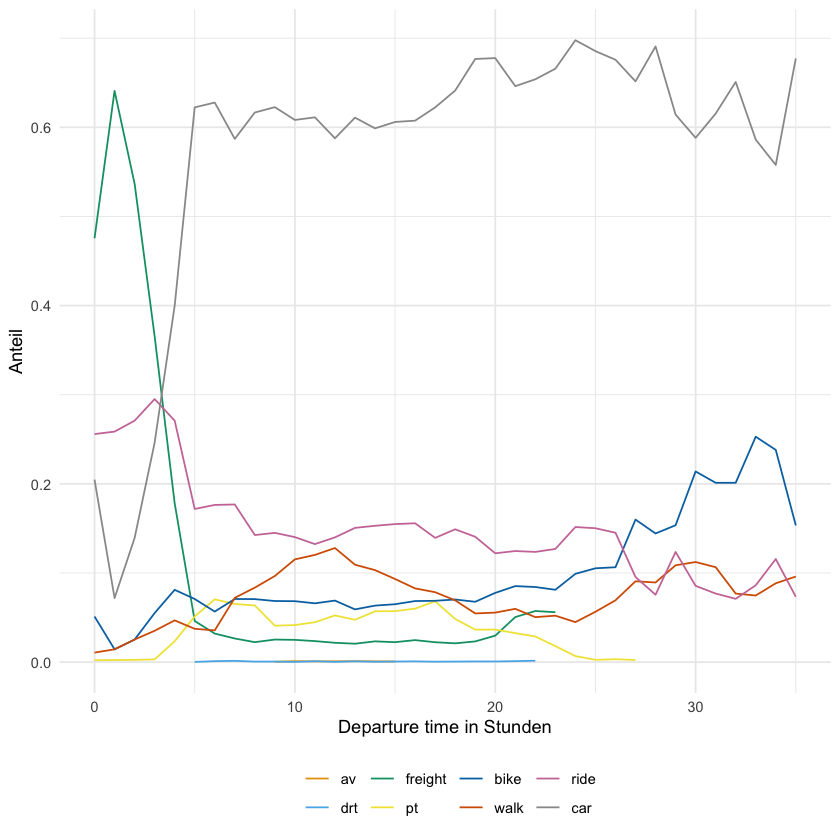

In [81]:
trips_data %>% mutate(dep_time_hour = hour(dep_time)) %>%
  group_by(dep_time_hour, main_mode) %>% count() %>% ungroup() %>% group_by(dep_time_hour) %>%
  mutate(Anteil = n / sum(n)) %>%
  ggplot(aes(dep_time_hour, Anteil, color = main_mode)) +
  geom_line() +
  xlab("Departure time in Stunden") +
  theme_minimal() +
  scale_color_okabe_ito() +
  theme(legend.position = "bottom", legend.title = element_blank())